# Introduction to Eigenvalues and Eigenvectors

Consider the following problem: a mouse is set loose in a house with the floorplan pictured below, and we are going to track the mouse's movements over time. At each time step, the mouse will exit the room it currently occupies, and it will choose an adjacent room to enter uniformly at random. Now, Room 1 contains a mousetrap. If the mouse enters room 1, then it will with probability 10% be caught in the trap in the next time step; if not caught it again exits the room, choosing which adjacent room to enter again uniformly at random. The question we would like to answer is: what happens over the long-term? Is the mouse guaranteed to eventually get caught in the trap? Or could it end up wandering the house forever, always avoiding the trap in room 1?

![Floorplan](assets/mousetrap.png "Floorplan")

This is a problem where the outcomes are probabilistic, and we can use a type of matrix called a transition matrix to model them. First, define the state of the mouse being caught in the trap as state 0, and the state of the mouse being in room 1 but not in the trap as state 1. Then define the state of the mouse being in room $k$ as state $k$ for $2\leq k \leq 9$. Let $M$ be a matrix where the entry in position $i, j$ is the probability of the mouse moving from state $j$ to state $i$. **Note:** We are switching to 0-based indexing now! The matrix then looks like this:

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la


# I like to enter my probabilities in the rows (which corresponds to state i -> state j), then transpose the matrix
M = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0.1, 0, 0.45, 0.45, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0.25, 0, 0, 0.25, 0.25, 0.25, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0],
              [0, 0, 0, 0, 0, 0, 1/3, 0, 1/3, 1/3],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
             ],
            dtype=np.float64)
M = M.T
print(M)

[[1.         0.1        0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.25       0.         0.
  0.         0.         0.         0.        ]
 [0.         0.45       0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.45       0.         0.         1.         1.
  0.5        0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.

The matrix above captures the probabilities of transitioning between different states in the system, but it does not track the state of the system, nor the probability of being in a particular state at a particular time. Suppose we define a 'state vector' $\mathbf{s}_t$ with 10 components where the entry in the $i^{th}$ component is the probability that the mouse is in the corresponding state (room) at time $t$. Then, for example, if we placed the mouse in room 9 at time $t=0$, we would represent that with the vector 

$$
    \mathbf{s}_0 = \begin{bmatrix}
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        0 \\
                        1
                    \end{bmatrix},
$$

where component 9 (0-based indexing!!!) is 1 because the mouse has probability 100% of being in room 9 if we just placed it there.

Now the matrix and the state vector work together to model the state of the system over time: $M\mathbf{s}_t = \mathbf{s}_{t+1}$. Let's see what happens over a few time steps. 

In [68]:
s_0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=np.float64)
s_0 = s.T

s_1 = M @ s_0
print(s_1)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


As expected, if the mouse starts in room 9, then after one time step, with 100% probability the mouse is in room 7. Let's take another step.

In [69]:
s_2 = M @ s_1
print(s_2)

[0.         0.         0.         0.         0.         0.
 0.33333333 0.         0.33333333 0.33333333]


Now things are less certain. There is a 1/3 probability that the mouse is in room 8, and corresponding probabilities that the mouse is in room 6 or back in room 9. We don't know the actual choice the mouse has made, but we have a model for the likelihood of the mouse being

In [70]:
s_3 = M @ s_2
print(s_3)

[0.         0.         0.         0.16666667 0.         0.
 0.         0.83333333 0.         0.        ]


In [71]:
s_4 = M @ s_3
print(s_4)

[0.         0.04166667 0.         0.         0.04166667 0.04166667
 0.31944444 0.         0.27777778 0.27777778]


In [72]:
s_5 = M @ s_4
print(s_5)

[0.00416667 0.         0.01875    0.26180556 0.         0.
 0.         0.71527778 0.         0.        ]


After 5 steps, there is a (very) slight chance that the mouse is caught in the trap: the probability in state 0 is now 0.00416667. Let's now run the experiment for several hundred time steps and store the states of the system as we run it in an array.

In [73]:
nsteps = 500

states = np.empty((nsteps, 10), dtype=np.float64)
states[0, :] = s
for t in range(nsteps - 1):
    states[t+1, :] = A @ states[t]
    states[t + 1, :] = states[t + 1, :] / sum(states[t + 1, :])  # normalization to address floating point arithmetic errors 

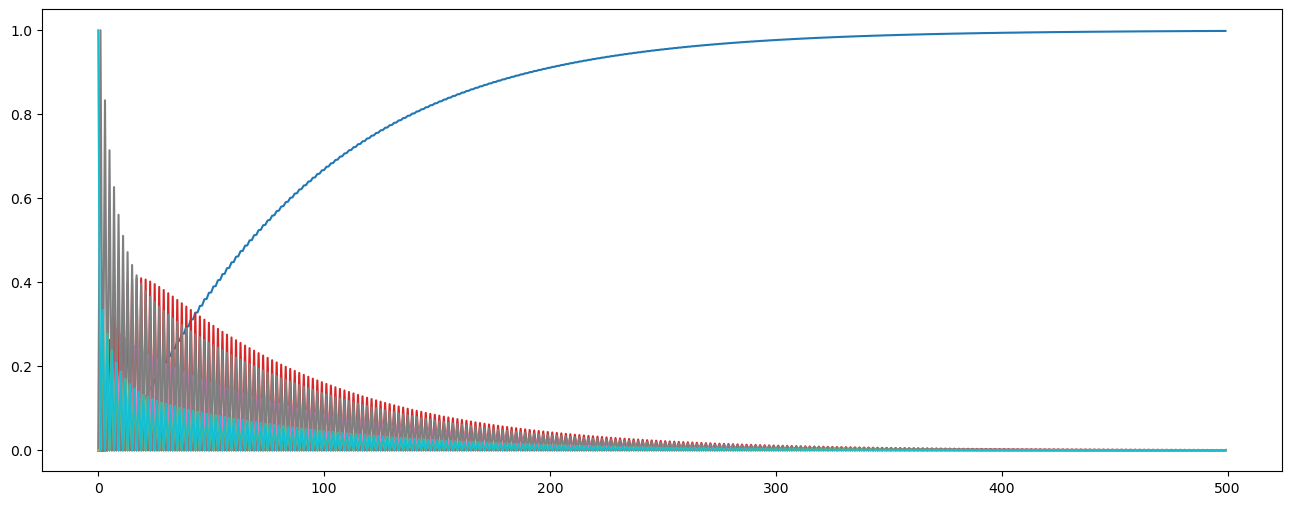

In [74]:
from IPython.core.pylabtools import figsize
figsize(16, 6)
plt.plot(states);

In [75]:
states[-1, :]

array([9.98429352e-01, 0.00000000e+00, 1.64084347e-04, 7.63259841e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.43304224e-04,
       0.00000000e+00, 0.00000000e+00])